In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
dat = pd.read_csv('datasets_regionalhappy.csv')

In [8]:
dat.columns = ["Happiness", "GDP", "Family", "Life.Expect", "Freedom", "Generosity", "Trust.Gov", "Dystopia"]

In [9]:
dat.head()

,Happiness,GDP,Family,Life.Expect,Freedom,Generosity,Trust.Gov,Dystopia
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(dat.GDP, prepend = False)

lm_mod = sm.OLS(dat.Happiness, predictors)
res = lm_mod.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     297.1
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.11e-37
Time:                        11:22:45   Log-Likelihood:                -154.91
No. Observations:                 155   AIC:                             313.8
Df Residuals:                     153   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            2.1842      0.127     17.238      0.000       1.934       2.435
const          3.2032      0.136     23.619      0.000       2.935       3.471
==============================================================================
Omnibus:                        0.351   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.494
Skew:                           0.088   Prob(JB):                        0.781
Kurtosis:                       2.787   Cond. No.                         4.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
predictors.head()


,GDP,const
0,1.616463,1.0
1,1.482383,1.0
2,1.480633,1.0
3,1.564980,1.0
4,1.443572,1.0


range of Happiness = { ' +str(min(dat.Happiness))+''+ str(min(dat.Happiness))+'}


Text(0, 0.5, 'Happiness')

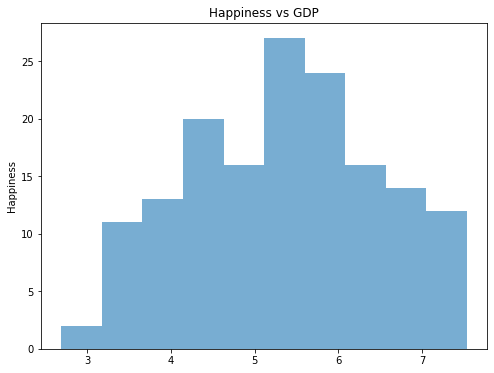

In [23]:
print("range of Happiness = { ' +str(min(dat.Happiness))+''+ str(min(dat.Happiness))+'}")

ax = plt.figure(figsize=(8,6)).gca()
dat.Happiness.plot.hist(ax= ax, alpha = 0.6)
plt.title('Happiness vs GDP')
plt.ylabel('Happiness')

Text(0.5, 0, 'GDP')

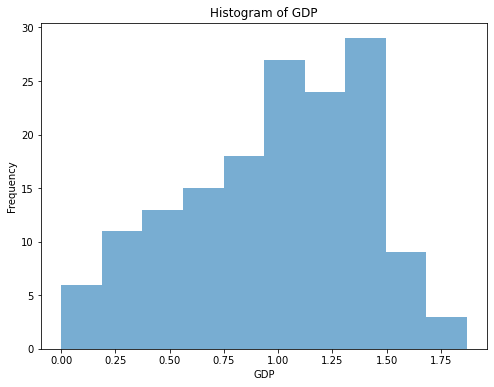

In [24]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
dat.GDP.plot.hist(ax = ax, alpha = 0.6)
plt.title('Histogram of GDP')
plt.xlabel('GDP')

In [25]:
#Creating a new data frame with the predictor value and a new constant
new_predict = pd.DataFrame({'GDP':[0.5], 'const':[1.0]})
# Make prediction with new values
res.predict(new_predict)

0    4.295305
dtype: float64

In [27]:
##This is handy. We can also give it several GDP scores (0.5, 0.9, 1.7). 
##In this case we can automate adding the constant column with the add_connstant method.
## Create a new data frame with the predictor value and constraint
new_predict = pd.DataFrame({'GDP':[0.5, 0.9, 1.0]})
new_predict = sm.add_constant(new_predict, prepend=False)
res.predict(new_predict)

0    4.295305
1    5.168979
2    5.387398
dtype: float64

Text(0.5, 1.0, 'Happiness vs GDP with linear regression line ')

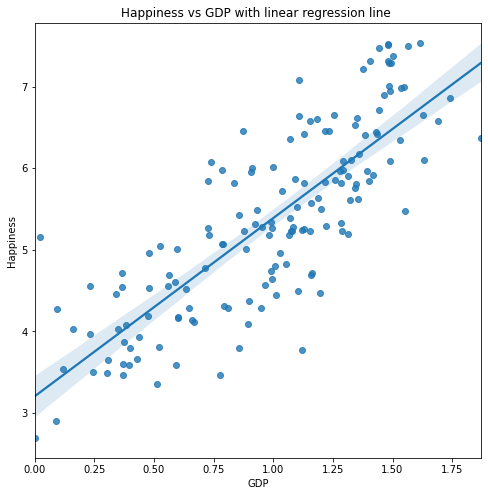

In [33]:
ax = plt.figure(figsize=(8,8)).gca()
sns.regplot(x='GDP', y='Happiness', data = dat,ax =ax)
plt.title('Happiness vs GDP with linear regression line ')

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     297.1
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.11e-37
Time:                        12:32:34   Log-Likelihood:                -154.91
No. Observations:                 155   AIC:                             313.8
Df Residuals:                     153   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            2.1842      0.127     17.238      0.000       1.934       2.435
const          3.2032      0.136     23.619      0.000       2.935       3.471
==============================================================================
Omnibus:                        0.351   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.494
Skew:                           0.088   Prob(JB):                        0.781
Kurtosis:                       2.787   Cond. No.                         4.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#We are going to look at the residuals and to start we'll create a new dataframe with the redictor value and constants
dat

,Happiness,GDP,Family,Life.Expect,Freedom,Generosity,Trust.Gov,Dystopia
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [39]:
new_predict = dat.GDP
new_predict = sm.add_constant(new_predict, prepend=False)
#Then we'll mke the prediction with the new values
new_predict['Score'] = res.predict(new_predict)
##Compute the residuals
new_predict['Residuals'] = dat.Happiness - new_predict['Score']

new_predict

,GDP,const,Score,Residuals
0,1.616463,1.0,6.733867,0.803133
1,1.482383,1.0,6.441011,1.080988
2,1.480633,1.0,6.437189,1.066811
3,1.564980,1.0,6.621417,0.872582
4,1.443572,1.0,6.356241,1.112759
...,...,...,...,...
150,0.368746,1.0,4.008622,-0.537622
151,0.777153,1.0,4.900659,-1.438659
152,0.511136,1.0,4.319628,-0.970628
153,0.091623,1.0,3.403333,-0.498333


Text(0, 0.5, 'Residual Values')

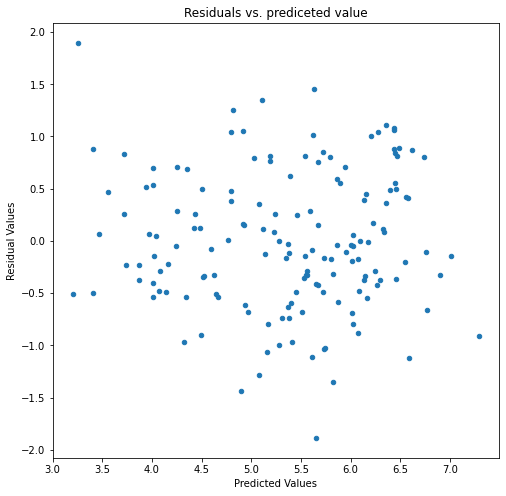

In [45]:
ax = plt.figure(figsize=(8,8)).gca()
new_predict.plot.scatter(x='Score', y = 'Residuals', ax=ax)
plt.title('Residuals vs. prediceted value')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')

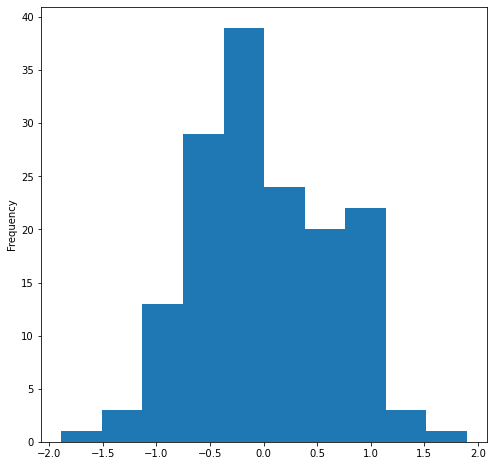

In [47]:
ax = plt.figure(figsize=(8,8)).gca()
new_predict.Residuals.plot.hist(ax=ax)

In [48]:
'''These residuals are beautifully Normally distributed. This is a good sign for our model. This means that we 
tend to under-predict (negative values) just as much as we over-predict (positive values). 
This looks like a healthy and valid regression model'''

'These residuals are beautifully Normally distributed. This is a good sign for our model. This means that we \ntend to under-predict (negative values) just as much as we over-predict (positive values). \nThis looks like a healthy and valid regression model'

# Multiple Regression

In [49]:
predictors = sm.add_constant(dat[['GDP', 'Freedom']], prepend=False)

lm_mod_2 = sm.OLS(dat.Happiness, predictors)
res_2 = lm_mod_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 10 May 2020   Prob (F-statistic):           9.64e-46
Time:                        13:07:37   Log-Likelihood:                -132.85
No. Observations:                 155   AIC:                             271.7
Df Residuals:                     152   BIC:                             280.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            1.8736      0.119     15.788      0.000       1.639       2.108
Freedom        2.3557      0.333      7.076      0.000       1.698       3.013
const          2.5461      0.150     16.955      0.000       2.249       2.843
==============================================================================
Omnibus:                        4.155   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.653
Skew:                          -0.336   Prob(JB):                        0.161
Kurtosis:                       3.336   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#look this up at some point
anova_lm(res, res_2)

/opt/miniconda3/envs/conda_env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/miniconda3/envs/conda_env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/miniconda3/envs/conda_env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,153.0,66.983338,0.0,NaN,NaN,NaN
1,152.0,50.385944,1.0,16.597394,50.069597,5.094782e-11


In [51]:
print('Adjusted coefficient for GDP = ' + str(res_2.params[0] * np.std(dat.GDP)/np.std(dat.Happiness)))
print('Adjusted coefficient for Freedom = ' + str(res_2.params[1] * np.std(dat.Freedom)/np.std(dat.Happiness)))

Adjusted coefficient for GDP = 0.6969353395951953
Adjusted coefficient for Freedom = 0.3123593556398879


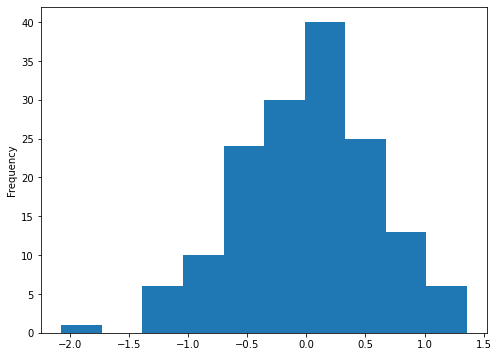

In [52]:
## Create a new data frame with the predictor values and the constant
new_predict = dat[['GDP','Freedom']]
new_predict = sm.add_constant(new_predict, prepend = False)
## Make prediction with new values and 2 predictor model
new_predict['Score'] = res_2.predict(new_predict)
## Compute the residuals 
new_predict['Residuals'] = dat.Happiness - new_predict.Score

## Plot the histogram of the residuals
ax = plt.figure(figsize=(8, 6)).gca() # define axis
new_predict.Residuals.plot.hist(ax = ax)

In [53]:
new_predict['Residuals'].mean()

-5.730183352904034e-16